In [1]:
from fastai.vision.all import *


path_dataset = "/home/mfmezger/data/covid-19-dataset-split/"
dls = ImageDataLoaders.from_folder(path_dataset, train='train', valid='test', item_tfms=Resize(256), bs=16)

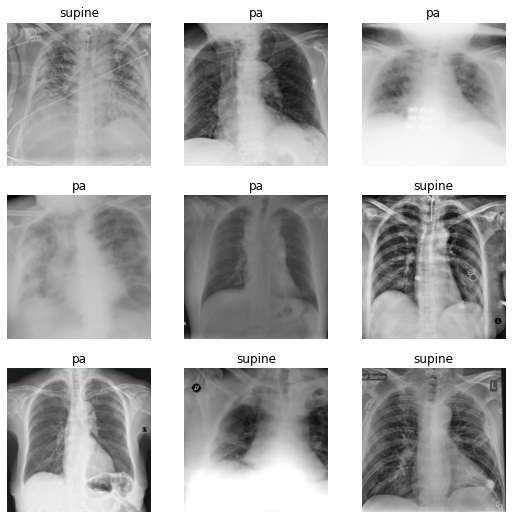

In [2]:
dls.show_batch()

In [3]:
learn = cnn_learner(dls, resnet50, metrics=accuracy)

SuggestedLRs(lr_min=0.002290867641568184, lr_steep=0.002511886414140463)

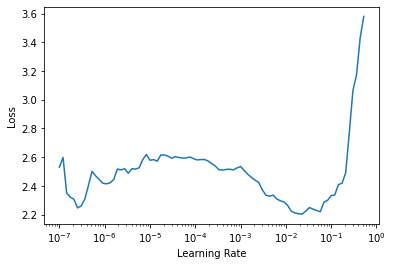

In [4]:
learn.lr_find()

In [5]:
#learn.fine_tune(15, 1e-2)

In [6]:
learn.fit(40, lr=1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,2.872363,2.761670,0.517241,00:07
1,1.929292,2.409188,0.586207,00:07
2,1.588300,1.018335,0.643678,00:06
3,1.483366,1.118185,0.597701,00:07
4,1.337671,0.955653,0.678161,00:07
5,1.221193,0.999383,0.701149,00:07
6,1.132210,0.924693,0.643678,00:06
7,1.013247,0.886364,0.712644,00:06
8,0.918977,1.138140,0.655172,00:06
9,0.942322,0.819504,0.632184,00:07


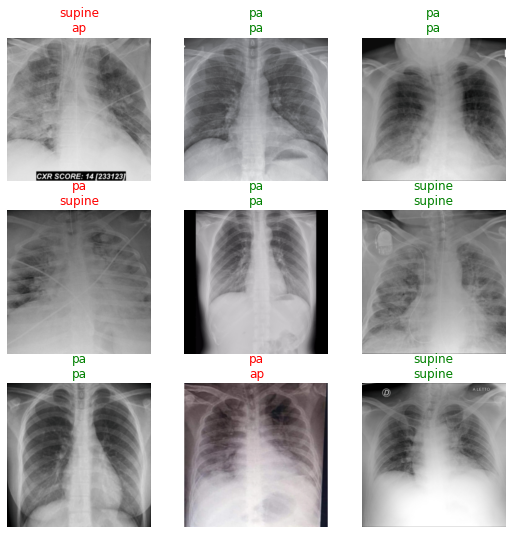

In [7]:
learn.show_results()

In [8]:
interp = Interpretation.from_learner(learn)

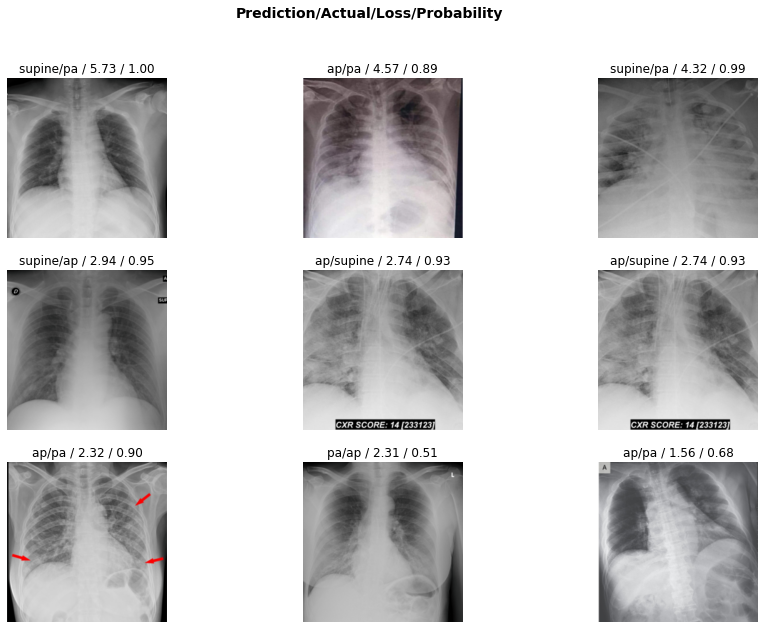

In [9]:
interp.plot_top_losses(9, figsize=(15,10))

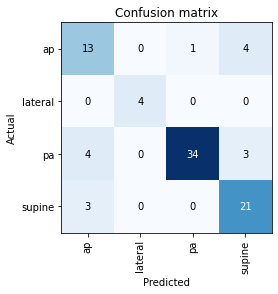

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [11]:
gcam = GradCam.from_interp(learner,interp,image_idx) #image_idx from ds.valid_ds or ds.test_ds
gcam.plot()

NameError: name 'GradCam' is not defined